<a href="https://colab.research.google.com/github/daheeem/Unsupervised-Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning with K-Means Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import math 
import statistics
import matplotlib.pyplot as plt

# FORMULASI MASALAH

This dataset comes from the daily measures of sensors in a urban waste water treatment plant. The objective is to classify the operational state of the plant in order to predict faults through the state variables of the plant at each of the stages of the treatment process. This domain has been stated as an ill-structured domain. 

# Import Data

In [ ]:
#Mengupload file water_treatment.csv
from google.colab import files
TheFile = files.upload()

Saving water_treatment.csv to water_treatment (3).csv


In [ ]:
#Mengimport data dari water_treatment.csv
df = pd.read_csv("water_treatment.csv", sep =",", na_values = "?")

In [ ]:
print(df)

          Days      Q-E  ZN-E  PH-E  DBO-E  DQO-E   SS-E  SSV-E  SED-E  \
0     D-1/3/90  44101.0  1.50   7.8    NaN  407.0  166.0   66.3    4.5   
1     D-2/3/90  39024.0  3.00   7.7    NaN  443.0  214.0   69.2    6.5   
2     D-4/3/90  32229.0  5.00   7.6    NaN  528.0  186.0   69.9    3.4   
3     D-5/3/90  35023.0  3.50   7.9  205.0  588.0  192.0   65.6    4.5   
4     D-6/3/90  36924.0  1.50   8.0  242.0  496.0  176.0   64.8    4.0   
..         ...      ...   ...   ...    ...    ...    ...    ...    ...   
522  D-26/8/91  32723.0  0.16   7.7   93.0  252.0  176.0   56.8    2.3   
523  D-27/8/91  33535.0  0.32   7.8  192.0  346.0  172.0   68.6    4.0   
524  D-28/8/91  32922.0  0.30   7.4  139.0  367.0  180.0   64.4    3.0   
525  D-29/8/91  32190.0  0.30   7.3  200.0  545.0  258.0   65.1    4.0   
526  D-30/8/91  30488.0  0.21   7.5  152.0  300.0  132.0   69.7    NaN   

     COND-E  ...  COND-S  RD-DBO-P  RD-SS-P  RD-SED-P  RD-DBO-S  RD-DQO-S  \
0      2110  ...  2000.0       NaN

In [ ]:
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      527 non-null    object 
 1   Q-E       509 non-null    float64
 2   ZN-E      524 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    float64
 5   DQO-E     521 non-null    float64
 6   SS-E      526 non-null    float64
 7   SSV-E     516 non-null    float64
 8   SED-E     502 non-null    float64
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    float64
 12  SS-P      527 non-null    int64  
 13  SSV-P     516 non-null    float64
 14  SED-P     503 non-null    float64
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    float64
 18  DQO-D     518 non-null    float64
 19  SS-D      525 non-null    float64
 20  SSV-D     514 non-null    float6

# Pra-Pemrosesan Data


In [ ]:
#Mengecek apakah terdapat Missing Value
df.isnull().sum()

Days         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
 RD-SS-G     8
RD-SED-G    31
dtype: int64

In [ ]:
#Mengganti missing value dengan nilai rata-rata
df['Q-E'].fillna(df['Q-E'].mean(), inplace = True)
df['ZN-E'].fillna(df['ZN-E'].mean(), inplace = True)
df['DBO-E'].fillna(df['DBO-E'].mean(), inplace = True)
df['DQO-E'].fillna(df['DQO-E'].mean(), inplace = True)
df['SS-E'].fillna(df['SS-E'].mean(), inplace = True)
df['SSV-E'].fillna(df['SSV-E'].mean(), inplace = True)
df['SED-E'].fillna(df['SED-E'].mean(), inplace = True)
df['DBO-P'].fillna(df['DBO-P'].mean(), inplace = True)
df['SSV-P '].fillna(df['SSV-P '].mean(), inplace = True)
df['SED-P'].fillna(df['SED-P'].mean(), inplace = True)
df['DBO-D'].fillna(df['DBO-D'].mean(), inplace = True)
df['DQO-D'].fillna(df['DQO-D'].mean(), inplace = True)
df['SS-D'].fillna(df['SS-D'].mean(), inplace = True)
df['SSV-D'].fillna(df['SSV-D'].mean(), inplace = True)
df['SED-D'].fillna(df['SED-D'].mean(), inplace = True)
df['PH-S'].fillna(df['PH-S'].mean(), inplace = True)
df['DBO-S'].fillna(df['DBO-S'].mean(), inplace = True)
df['DQO-S'].fillna(df['DQO-S'].mean(), inplace = True)
df['SS-S'].fillna(df['SS-S'].mean(), inplace = True)
df['SSV-S'].fillna(df['SSV-S'].mean(), inplace = True)
df['SED-S'].fillna(df['SED-S'].mean(), inplace = True)
df['COND-S'].fillna(df['COND-S'].mean(), inplace = True)
df['RD-DBO-P'].fillna(df['RD-DBO-P'].mean(), inplace = True)
df['RD-SS-P'].fillna(df['RD-SS-P'].mean(), inplace = True)
df['RD-SED-P'].fillna(df['RD-SED-P'].mean(), inplace = True)
df['RD-DBO-S'].fillna(df['RD-DBO-S'].mean(), inplace = True)
df['RD-DQO-S'].fillna(df['RD-DQO-S'].mean(), inplace = True)
df['RD-DBO-G'].fillna(df['RD-DBO-G'].mean(), inplace = True)
df['RD-DQO-G'].fillna(df['RD-DQO-G'].mean(), inplace = True)
df[' RD-SS-G'].fillna(df[' RD-SS-G'].mean(), inplace = True)
df['RD-SED-G'].fillna(df['RD-SED-G'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

Days        0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
 RD-SS-G    0
RD-SED-G    0
dtype: int64

In [ ]:
#Mengganti seluruh data menjadi bertipe float
convert_dict = {'COND-E': float,
                'SS-P': float,
                'COND-P': float,
                'COND-D': float,
                }
df = df.astype(convert_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      527 non-null    object 
 1   Q-E       527 non-null    float64
 2   ZN-E      527 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    float64
 5   DQO-E     527 non-null    float64
 6   SS-E      527 non-null    float64
 7   SSV-E     527 non-null    float64
 8   SED-E     527 non-null    float64
 9   COND-E    527 non-null    float64
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    float64
 12  SS-P      527 non-null    float64
 13  SSV-P     527 non-null    float64
 14  SED-P     527 non-null    float64
 15  COND-P    527 non-null    float64
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    float64
 18  DQO-D     527 non-null    float64
 19  SS-D      527 non-null    float64
 20  SSV-D     527 non-null    float6

# VISUALISASI DATA


Melihat Outlier Data menggunakan Box Plot

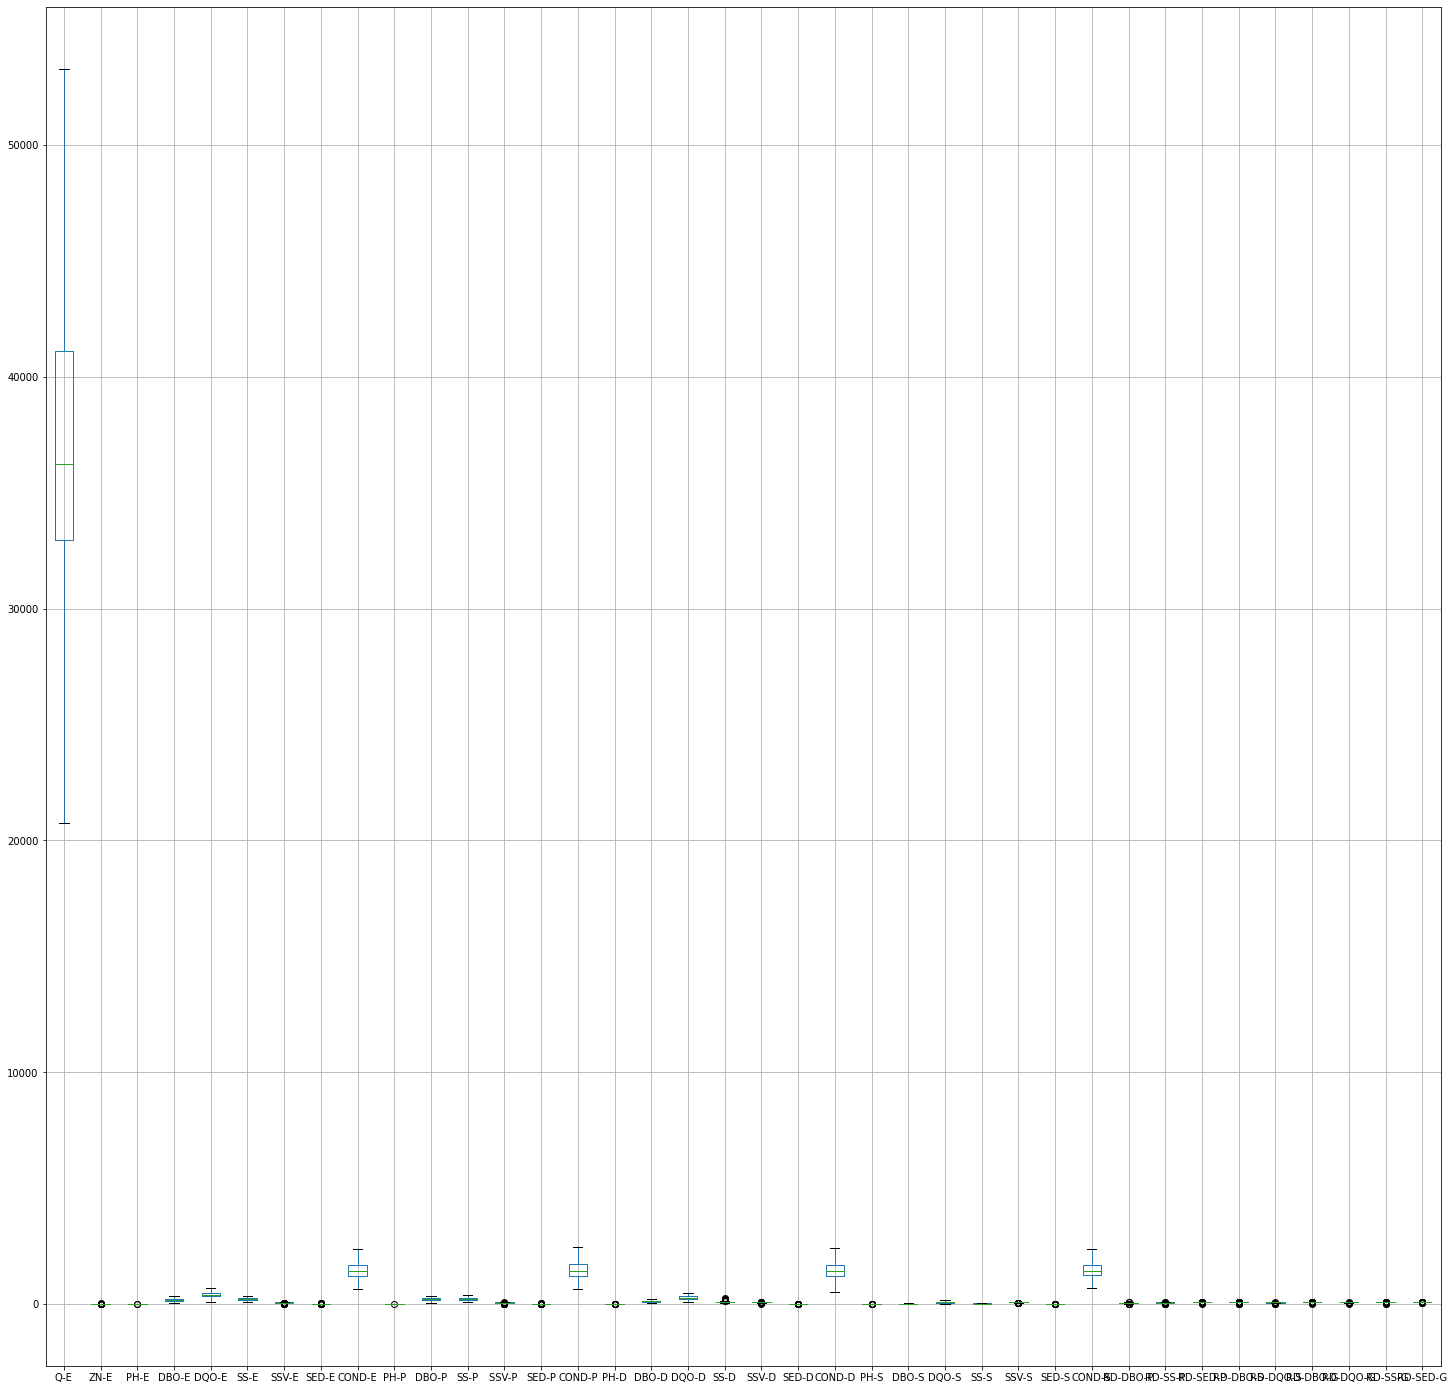

In [ ]:
#Menampilkan Boxplot
plt.figure(figsize = (25,25))
pd.DataFrame.boxplot(df)

Melakukan handling outlier data

In [ ]:
# menghitung jarak interquartile
def interquartile(data,x):
  q1 = (data[x]).quantile(0.25)
  q3 = (data[x]).quantile(0.75) 
  iqr = q3 - q1
  maximum = q3 + (1.5 *iqr)
  minimum = q1 - (1.5 *iqr)
  return maximum,minimum

# menggantikan value outliners dengan hasil dari perhitungan jarak interquartile
def sub_outliners(data,x,maximum,minimum):
  more_than = (data[x] > maximum)
  less_than = (data[x] < minimum)
  data[x] = data[x].mask(more_than, maximum,axis=0)
  data[x] = data[x].mask(less_than, minimum,axis=0)
  return data

maximum,minimum = interquartile(df,'Q-E')
df = sub_outliners(df,'Q-E',maximum,minimum)

maximum,minimum = interquartile(df,'DBO-E')
df = sub_outliners(df,'DBO-E',maximum,minimum)

maximum,minimum = interquartile(df,'DQO-E')
df = sub_outliners(df,'DQO-E',maximum,minimum)

maximum,minimum = interquartile(df,'SS-E')
df = sub_outliners(df,'SS-E',maximum,minimum)

maximum,minimum = interquartile(df,'COND-E')
df = sub_outliners(df,'COND-E',maximum,minimum)

maximum,minimum = interquartile(df,'DBO-P')
df = sub_outliners(df,'DBO-P',maximum,minimum)

maximum,minimum = interquartile(df,'SS-P')
df = sub_outliners(df,'SS-P',maximum,minimum)

maximum,minimum = interquartile(df,'COND-P')
df = sub_outliners(df,'COND-P',maximum,minimum)

maximum,minimum = interquartile(df,'DBO-D')
df = sub_outliners(df,'DBO-D',maximum,minimum)

maximum,minimum = interquartile(df,'DQO-D')
df = sub_outliners(df,'DQO-D',maximum,minimum)

maximum,minimum = interquartile(df,'COND-D')
df = sub_outliners(df,'COND-D',maximum,minimum)

maximum,minimum = interquartile(df,'DBO-S')
df = sub_outliners(df,'DBO-S',maximum,minimum)

maximum,minimum = interquartile(df,'DQO-S')
df = sub_outliners(df,'DQO-S',maximum,minimum)

maximum,minimum = interquartile(df,'SS-S')
df = sub_outliners(df,'SS-S',maximum,minimum)

maximum,minimum = interquartile(df,'COND-S')
df = sub_outliners(df,'COND-S',maximum,minimum)


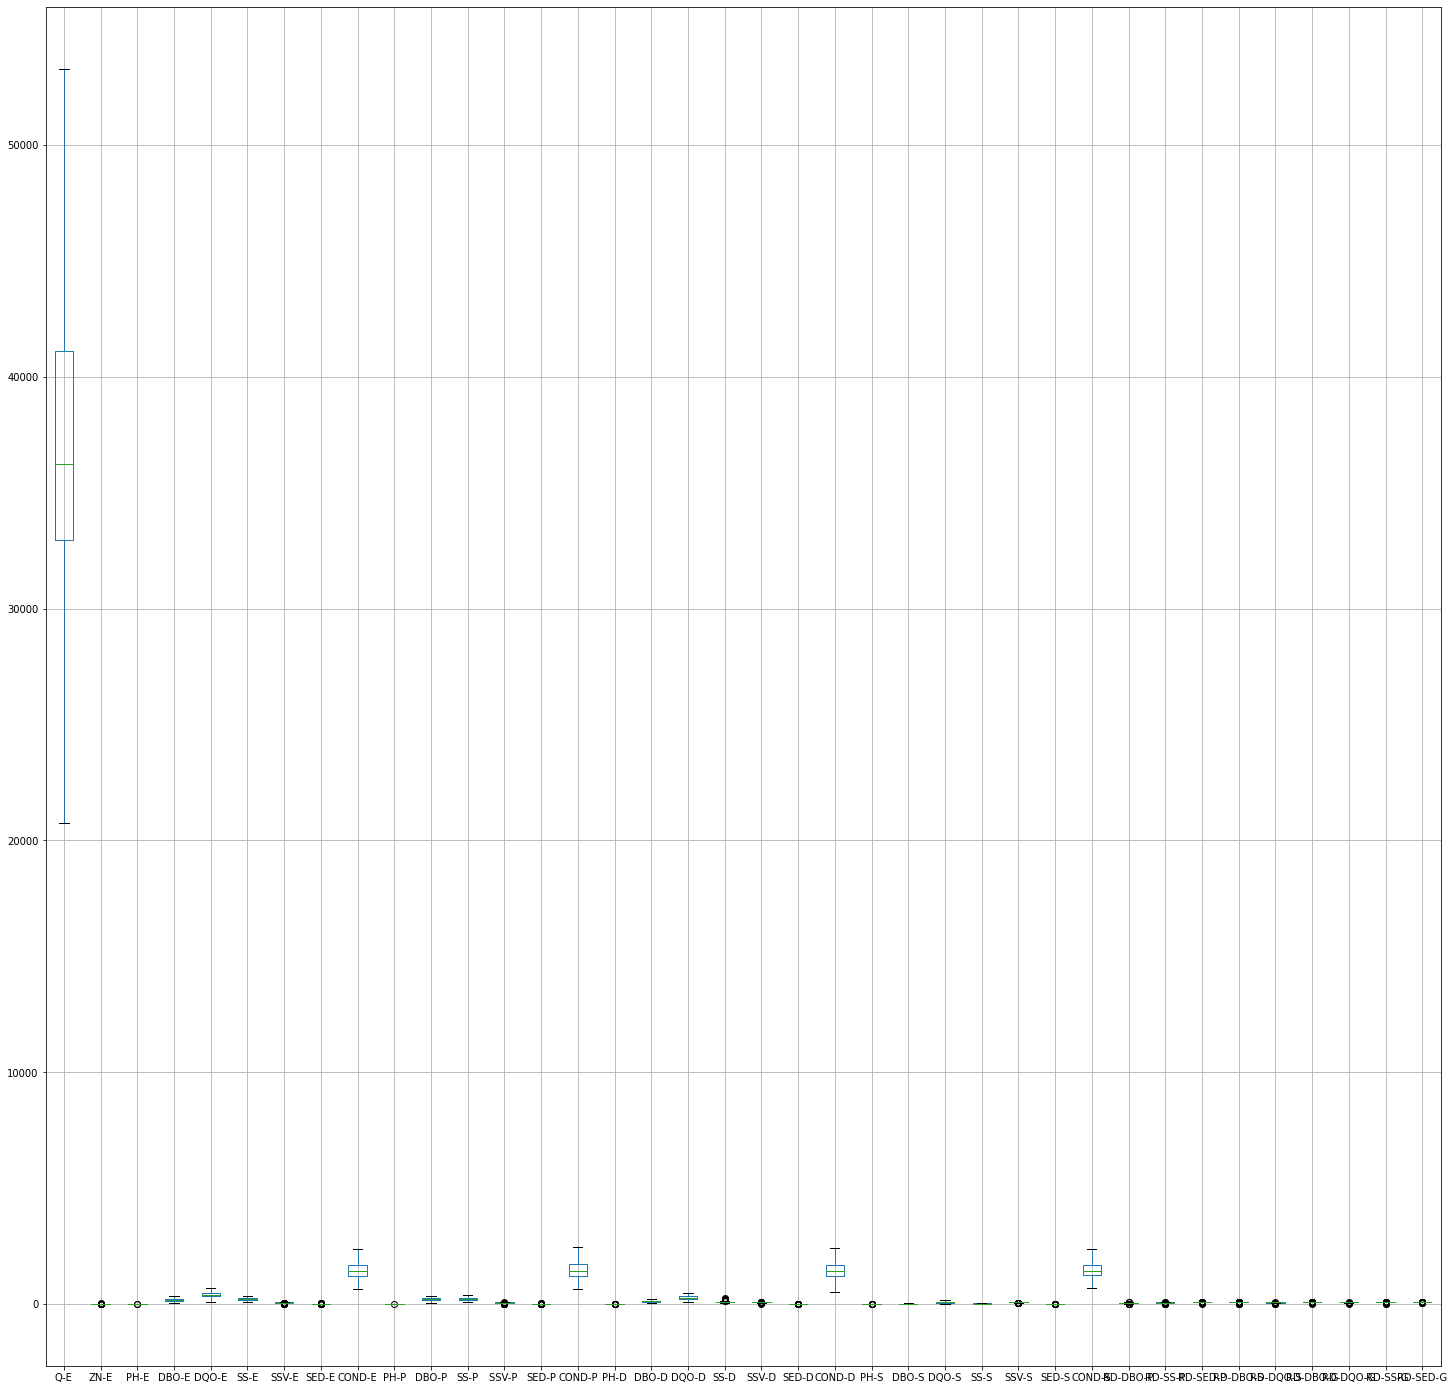

In [ ]:
plt.figure(figsize = (25,25))
pd.DataFrame.boxplot(df)

In [ ]:
print(df)

          Days      Q-E  ZN-E  PH-E       DBO-E  DQO-E   SS-E  SSV-E  \
0     D-1/3/90  44101.0  1.50   7.8  188.714286  407.0  166.0   66.3   
1     D-2/3/90  39024.0  3.00   7.7  188.714286  443.0  214.0   69.2   
2     D-4/3/90  32229.0  5.00   7.6  188.714286  528.0  186.0   69.9   
3     D-5/3/90  35023.0  3.50   7.9  205.000000  588.0  192.0   65.6   
4     D-6/3/90  36924.0  1.50   8.0  242.000000  496.0  176.0   64.8   
..         ...      ...   ...   ...         ...    ...    ...    ...   
522  D-26/8/91  32723.0  0.16   7.7   93.000000  252.0  176.0   56.8   
523  D-27/8/91  33535.0  0.32   7.8  192.000000  346.0  172.0   68.6   
524  D-28/8/91  32922.0  0.30   7.4  139.000000  367.0  180.0   64.4   
525  D-29/8/91  32190.0  0.30   7.3  200.000000  545.0  258.0   65.1   
526  D-30/8/91  30488.0  0.21   7.5  152.000000  300.0  132.0   69.7   

        SED-E  COND-E  ...   COND-S   RD-DBO-P  RD-SS-P  RD-SED-P   RD-DBO-S  \
0    4.500000  2110.0  ...  2000.00  39.085806     58.8

Normalisasi Data


In [ ]:
dt = df.drop(['Days'], axis=1)

In [ ]:
#Melakukan normalisasi data menjadi berskala 0-1
dt = (dt-np.min(dt))/(np.max(dt)-np.min(dt))
print(dt)

          Q-E      ZN-E      PH-E     DBO-E     DQO-E      SS-E     SSV-E  \
0    0.717466  0.041916  0.500000  0.512548  0.510980  0.269841  0.739554   
1    0.561347  0.086826  0.444444  0.512548  0.571791  0.460317  0.779944   
2    0.352399  0.146707  0.388889  0.512548  0.715372  0.349206  0.789694   
3    0.438315  0.101796  0.555556  0.567568  0.816723  0.373016  0.729805   
4    0.496771  0.041916  0.611111  0.692568  0.661318  0.309524  0.718663   
..        ...       ...       ...       ...       ...       ...       ...   
522  0.367589  0.001796  0.444444  0.189189  0.249155  0.309524  0.607242   
523  0.392558  0.006587  0.500000  0.523649  0.407939  0.293651  0.771588   
524  0.373708  0.005988  0.277778  0.344595  0.443412  0.325397  0.713092   
525  0.351199  0.005988  0.222222  0.550676  0.744088  0.634921  0.722841   
526  0.298862  0.003293  0.333333  0.388514  0.330236  0.134921  0.786908   

        SED-E    COND-E      PH-P  ...    COND-S  RD-DBO-P   RD-SS-P  \
0  

Reduksi Dimensi


In [ ]:
#Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
fit_pca = pca.fit_transform(dt)
data_fit = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])

In [ ]:
print(data_fit)

        PCA_1     PCA_2
0   -0.419269 -0.244035
1   -0.839763 -0.181101
2   -0.282144 -0.169161
3   -0.799293 -0.129454
4   -0.649815 -0.144493
..        ...       ...
522  0.978394 -0.190840
523  0.533344 -0.149866
524  0.480775 -0.097264
525  0.154976  0.191929
526  0.630016 -0.141099

[527 rows x 2 columns]


#K-MEANS ALGORITHM

In [ ]:
#Melakukan perhitungan jarak
def hitungJarak(x1,x2,c1,c2):
  jarak = math.sqrt((x1-c1)**2 +(c2-x2)**2)
  return jarak


Main program

Iterasi Ke-  1
Centroid 1: ( -0.4192691697987761 , -0.2440350795947824 )
Centroid 2: ( -0.8397630647338595 , -0.1811009347131582 )


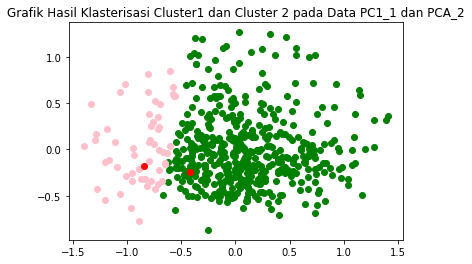

        PCA_1     PCA_2
0   -0.419269 -0.244035
1   -0.282144 -0.169161
2   -0.416323 -0.176378
3   -0.468106  0.209804
4   -0.366343  0.550362
..        ...       ...
466  0.978394 -0.190840
467  0.533344 -0.149866
468  0.480775 -0.097264
469  0.154976  0.191929
470  0.630016 -0.141099

[471 rows x 2 columns]
Iterasi Ke-  2
Centroid 1: ( 0.10341597603323788 , -0.004868210332962498 )
Centroid 2: ( -0.8698022269938404 , 0.04094512619330989 )


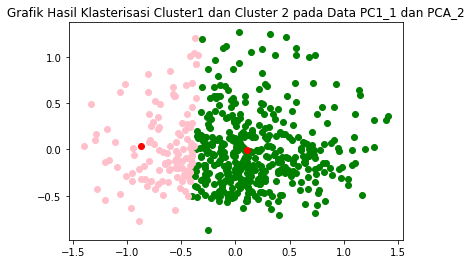

        PCA_1     PCA_2
0   -0.282144 -0.169161
1    0.111176 -0.077312
2   -0.027680  0.375194
3    0.332259 -0.637651
4    0.229392 -0.375901
..        ...       ...
404  0.978394 -0.190840
405  0.533344 -0.149866
406  0.480775 -0.097264
407  0.154976  0.191929
408  0.630016 -0.141099

[409 rows x 2 columns]
Iterasi Ke-  3
Centroid 1: ( 0.1904646715415698 , -0.010479689238951418 )
Centroid 2: ( -0.6601699208517124 , 0.03632366863331481 )


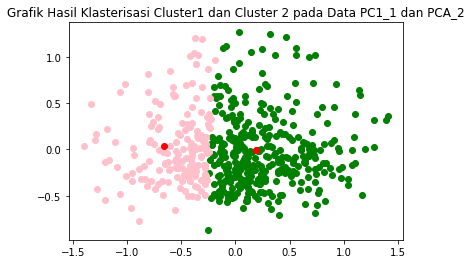

        PCA_1     PCA_2
0    0.111176 -0.077312
1   -0.027680  0.375194
2    0.332259 -0.637651
3    0.229392 -0.375901
4   -0.104609 -0.028410
..        ...       ...
353  0.978394 -0.190840
354  0.533344 -0.149866
355  0.480775 -0.097264
356  0.154976  0.191929
357  0.630016 -0.141099

[358 rows x 2 columns]
Iterasi Ke-  4
Centroid 1: ( 0.2605248790972129 , -0.01567069537779777 )
Centroid 2: ( -0.5518811048331493 , 0.03319591091864863 )


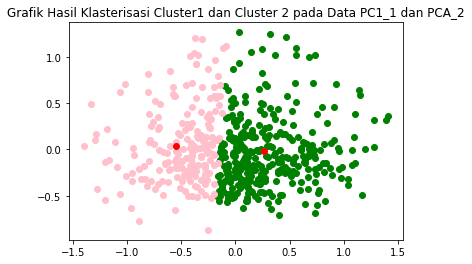

        PCA_1     PCA_2
0    0.111176 -0.077312
1   -0.027680  0.375194
2    0.332259 -0.637651
3    0.229392 -0.375901
4   -0.104609 -0.028410
..        ...       ...
323  0.978394 -0.190840
324  0.533344 -0.149866
325  0.480775 -0.097264
326  0.154976  0.191929
327  0.630016 -0.141099

[328 rows x 2 columns]
Iterasi Ke-  5
Centroid 1: ( 0.30127361618383963 , -0.033811671919342715 )
Centroid 2: ( -0.49657158848391675 , 0.0557297909022333 )


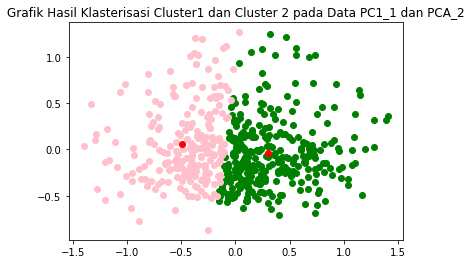

        PCA_1     PCA_2
0    0.111176 -0.077312
1   -0.027680  0.375194
2    0.332259 -0.637651
3    0.229392 -0.375901
4    0.091297  0.248955
..        ...       ...
301  0.978394 -0.190840
302  0.533344 -0.149866
303  0.480775 -0.097264
304  0.154976  0.191929
305  0.630016 -0.141099

[306 rows x 2 columns]
Iterasi Ke-  6
Centroid 1: ( 0.3307013901512189 , -0.046306552220983135 )
Centroid 2: ( -0.45789423251707245 , 0.06411676461366904 )


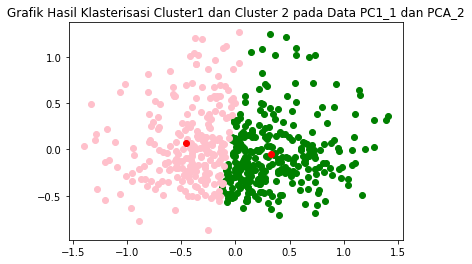

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
287  0.978394 -0.190840
288  0.533344 -0.149866
289  0.480775 -0.097264
290  0.154976  0.191929
291  0.630016 -0.141099

[292 rows x 2 columns]
Iterasi Ke-  7
Centroid 1: ( 0.3501639957019033 , -0.05063495223458201 )
Centroid 2: ( -0.4350973904040672 , 0.06291662149999133 )


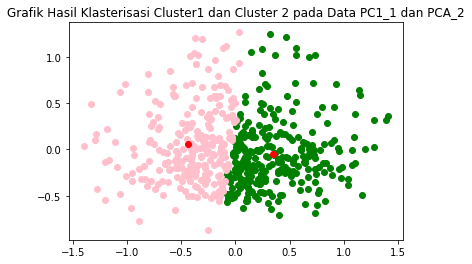

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
276  0.978394 -0.190840
277  0.533344 -0.149866
278  0.480775 -0.097264
279  0.154976  0.191929
280  0.630016 -0.141099

[281 rows x 2 columns]
Iterasi Ke-  8
Centroid 1: ( 0.3661929345210926 , -0.05043807273081968 )
Centroid 2: ( -0.41829355528628875 , 0.057614221290082715 )


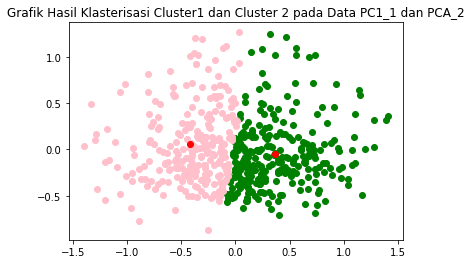

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
270  0.978394 -0.190840
271  0.533344 -0.149866
272  0.480775 -0.097264
273  0.154976  0.191929
274  0.630016 -0.141099

[275 rows x 2 columns]
Iterasi Ke-  9
Centroid 1: ( 0.3752315395987363 , -0.04947939840417202 )
Centroid 2: ( -0.4094788626573512 , 0.05399537524264811 )


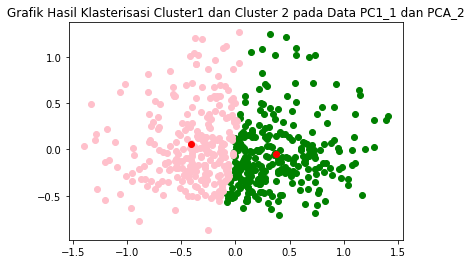

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
266  0.978394 -0.190840
267  0.533344 -0.149866
268  0.480775 -0.097264
269  0.154976  0.191929
270  0.630016 -0.141099

[271 rows x 2 columns]
Iterasi Ke-  10
Centroid 1: ( 0.38142047128806766 , -0.047608132265516384 )
Centroid 2: ( -0.40376932702760293 , 0.05039767126544905 )


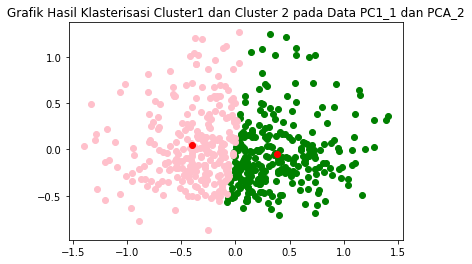

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
263  0.978394 -0.190840
264  0.533344 -0.149866
265  0.480775 -0.097264
266  0.154976  0.191929
267  0.630016 -0.141099

[268 rows x 2 columns]
Iterasi Ke-  11
Centroid 1: ( 0.38601175903824764 , -0.04711512308721551 )
Centroid 2: ( -0.3994252950666038 , 0.048752328136578274 )


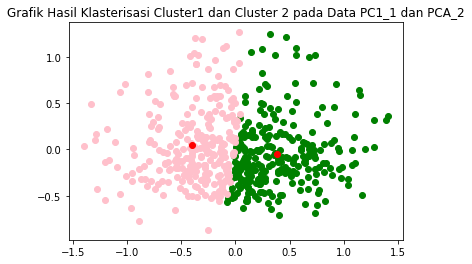

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
260  0.978394 -0.190840
261  0.533344 -0.149866
262  0.480775 -0.097264
263  0.154976  0.191929
264  0.630016 -0.141099

[265 rows x 2 columns]
Iterasi Ke-  12
Centroid 1: ( 0.39048086770565466 , -0.04763960957686137 )
Centroid 2: ( -0.39495202267938356 , 0.04818510128957359 )


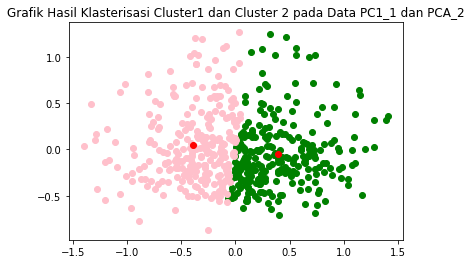

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
256  0.978394 -0.190840
257  0.533344 -0.149866
258  0.480775 -0.097264
259  0.154976  0.191929
260  0.630016 -0.141099

[261 rows x 2 columns]
Iterasi Ke-  13
Centroid 1: ( 0.3966348542514262 , -0.04757925758369033 )
Centroid 2: ( -0.3891793118782792 , 0.04668491063662855 )


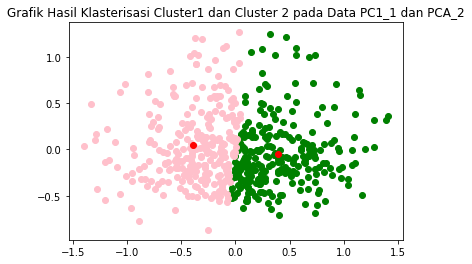

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
252  0.978394 -0.190840
253  0.533344 -0.149866
254  0.480775 -0.097264
255  0.154976  0.191929
256  0.630016 -0.141099

[257 rows x 2 columns]
Iterasi Ke-  14
Centroid 1: ( 0.40300477020785536 , -0.046704332176573646 )
Centroid 2: ( -0.3836008368274772 , 0.04445560507177571 )


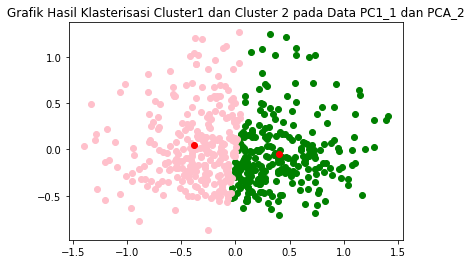

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
249  0.978394 -0.190840
250  0.533344 -0.149866
251  0.480775 -0.097264
252  0.154976  0.191929
253  0.630016 -0.141099

[254 rows x 2 columns]
Iterasi Ke-  15
Centroid 1: ( 0.40807292952872243 , -0.04390067128805533 )
Centroid 2: ( -0.3796722494516319 , 0.040845313213062534 )


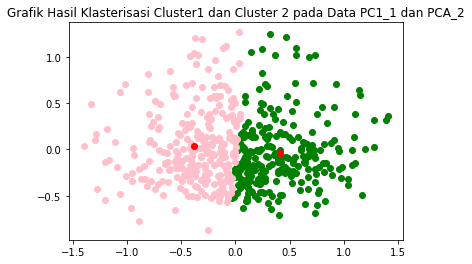

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
247  0.978394 -0.190840
248  0.533344 -0.149866
249  0.480775 -0.097264
250  0.154976  0.191929
251  0.630016 -0.141099

[252 rows x 2 columns]
Iterasi Ke-  16
Centroid 1: ( 0.41145259447603266 , -0.04204046869630704 )
Centroid 2: ( -0.37704019566531 , 0.0385243567689796 )


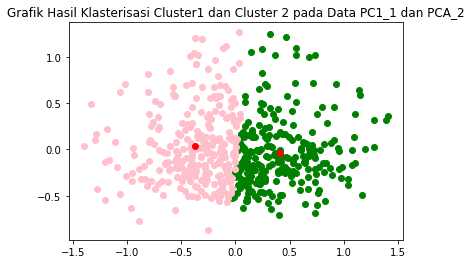

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
246  0.978394 -0.190840
247  0.533344 -0.149866
248  0.480775 -0.097264
249  0.154976  0.191929
250  0.630016 -0.141099

[251 rows x 2 columns]
Iterasi Ke-  17
Centroid 1: ( 0.4131208668406699 , -0.04135177413341335 )
Centroid 2: ( -0.3757004984674209 , 0.03760614241843032 )


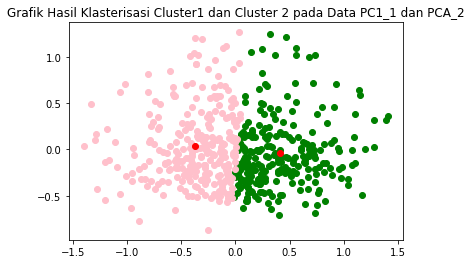

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
245  0.978394 -0.190840
246  0.533344 -0.149866
247  0.480775 -0.097264
248  0.154976  0.191929
249  0.630016 -0.141099

[250 rows x 2 columns]
Iterasi Ke-  18
Centroid 1: ( 0.41491575169077227 , -0.03943056069801601 )
Centroid 2: ( -0.37447270008192446 , 0.035587148644418844 )


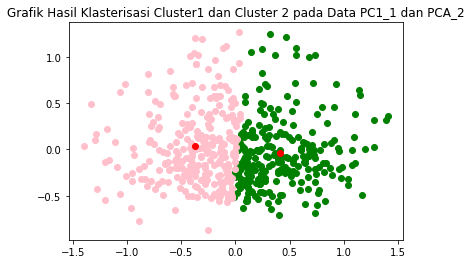

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
244  0.978394 -0.190840
245  0.533344 -0.149866
246  0.480775 -0.097264
247  0.154976  0.191929
248  0.630016 -0.141099

[249 rows x 2 columns]
Iterasi Ke-  19
Centroid 1: ( 0.4166938992486534 , -0.037578736455853134 )
Centroid 2: ( -0.3732258306219954 , 0.03365865243707715 )


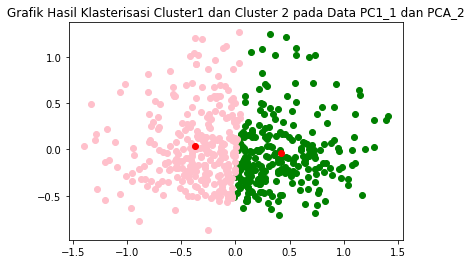

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
243  0.978394 -0.190840
244  0.533344 -0.149866
245  0.480775 -0.097264
246  0.154976  0.191929
247  0.630016 -0.141099

[248 rows x 2 columns]
Iterasi Ke-  20
Centroid 1: ( 0.41837797434732804 , -0.03673467120519381 )
Centroid 2: ( -0.37189153275318054 , 0.03265304107128345 )


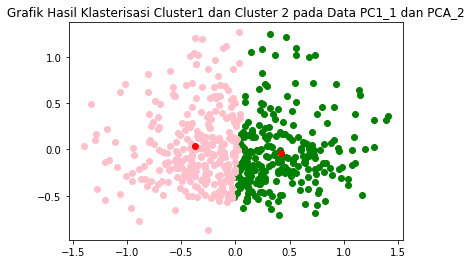

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
242  0.978394 -0.190840
243  0.533344 -0.149866
244  0.480775 -0.097264
245  0.154976  0.191929
246  0.630016 -0.141099

[247 rows x 2 columns]
Iterasi Ke-  21
Centroid 1: ( 0.4199816413560242 , -0.036864739230602725 )
Centroid 2: ( -0.37048380505335 , 0.03251996639271032 )


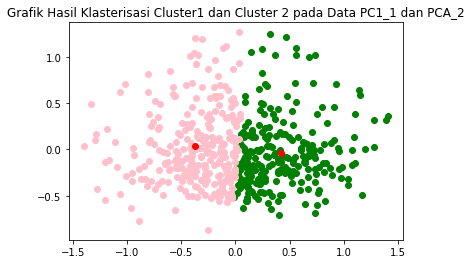

        PCA_1     PCA_2
0    0.111176 -0.077312
1    0.332259 -0.637651
2    0.229392 -0.375901
3    0.091297  0.248955
4    0.604346  0.006684
..        ...       ...
240  0.978394 -0.190840
241  0.533344 -0.149866
242  0.480775 -0.097264
243  0.154976  0.191929
244  0.630016 -0.141099

[245 rows x 2 columns]
Iterasi Ke-  22
Centroid 1: ( 0.42328131338302755 , -0.03639504830473193 )
Centroid 2: ( -0.3677444034710701 , 0.0316198114704232 )


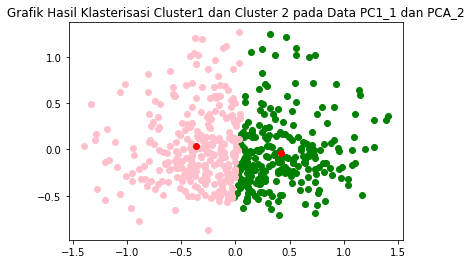

In [ ]:
#K-MEANS

c1x1 = data_fit['PCA_1'][0]
c1x2 = data_fit['PCA_2'][0]

c2x1 = data_fit['PCA_1'][1]
c2x2 = data_fit['PCA_2'][1]

j = 1
while(True):
  print("Iterasi Ke- ",j)
  p1c1 = []
  p2c1 = []
  c1 = {
      "PCA_1":p1c1,
      "PCA_2":p2c1,
  }
  pc1 = pd.DataFrame(c1)

  p1c2 = []
  p2c2 = []
  c2 = {
      "PCA_1":p1c2,
      "PCA_2":p2c2,
  }
  pc2 = pd.DataFrame(c2)

  print("Centroid 1: (",c1x1,",",c1x2,")")
  print("Centroid 2: (",c2x1,",",c2x2,")")



  for i in range(len(data_fit)):
    j1 = hitungJarak(data_fit['PCA_1'][i],data_fit['PCA_2'][i],c1x1,c1x2)
    j2 = hitungJarak(data_fit['PCA_1'][i],data_fit['PCA_2'][i],c2x1,c2x2)
    if j1 < j2 :
      p1c1.append(data_fit['PCA_1'][i])
      p2c1.append(data_fit['PCA_2'][i])
    else:
      p1c2.append(data_fit['PCA_1'][i])
      p2c2.append(data_fit['PCA_2'][i]) 

  mc1x1 = statistics.mean(p1c1)
  mc1x2 = statistics.mean(p2c1)

  mc2x1 = statistics.mean(p1c2)
  mc2x2 = statistics.mean(p2c2)

  plt.scatter(c1['PCA_1'], c1['PCA_2'], color = 'green')
  plt.scatter(c2['PCA_1'], c2['PCA_2'], color = 'pink')
  plt.scatter(c1x1, c1x2, color = 'Red')
  plt.scatter(c2x1, c2x2, color = 'Red')
  plt.title("Grafik Hasil Klasterisasi Cluster1 dan Cluster 2 pada Data PC1_1 dan PCA_2")
  plt.show()

  if(mc1x1 == c1x1 and mc1x2 == c1x2 and mc2x1 == c2x1 and mc2x2 == c2x2):
    break
  else:
    c1x1 = mc1x1
    c1x2 = mc1x2

    c2x1 = mc2x1
    c2x2 = mc2x2

    
  
  j = j + 1

  pc1 = pd.DataFrame(c1)
  print(pc1)


#Hasil Akhir Clustering

Menampilkan scatterplot persebaran data sesuai clustering

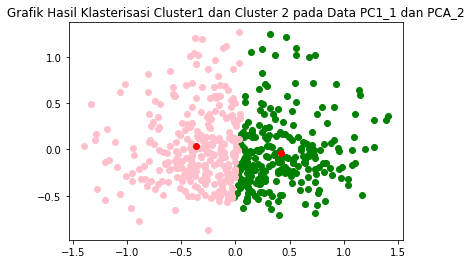

In [ ]:
#Menampilkan scatterplot 
plt.scatter(c1['PCA_1'], c1['PCA_2'], color = 'green')
plt.scatter(c2['PCA_1'], c2['PCA_2'], color = 'pink')
plt.scatter(c1x1, c1x2, color = 'Red')
plt.scatter(c2x1, c2x2, color = 'Red')
plt.title("Grafik Hasil Klasterisasi Cluster1 dan Cluster 2 pada Data PC1_1 dan PCA_2")
plt.show()